# House Price Advanced Regression Techniques

<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png"></center>

Predicting the price of houses in the test dataset using Advanced Regression Techniques

We are provided with two datasets train and test. Both train and test data have 1460 entries and 79 variables. Train data has Sale price of houses. By using train data we have to make an advanced regression model which can accurately predict the sale price of a house given values for all variables. And this model will be used to predict sale price for samples in the test set.

## Methodology

* __Importing Required Libraries__
* __Loading Train Data__
* __Exploring Train Data__
* __Correlation Matrix for Train Data__
* __Loading Test data__
* __Combining Train and Test Dataframes__
* __Data Preprocessing for combined Dataframe__
    * Feature Selection –selecting features highly correlated with Target variable
    * Imputing missing values with appropriate method
    * Imputing missing values for LotFrontage by Regression
* __Splitting Train and Test dataframe from Combined dataframe (without null values)__
* __Data Visualization__
* __X, y Split__
* __Feature Scaling__
* __Train Test Split__
* __Prediction using different Machine Learning models for Train data__
    * Linear Regression
    * Ridge Regression
    * Lasso Regression
    * ElasticNet Regression
    * Random Forest Regression
    * Extreme Gradient Boosting Regression (XGBoost)
    * Polynomial Regression
* __Model Comparison__
* __Making Predictions using best model for Test data__

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

#### Loading Train data

In [2]:
Df = pd.read_csv("train.csv")

### Exploratoring and Preparing Data

**Viewing the dataset**

In [3]:
pd.set_option('display.max_columns',100)

**Checking the shape of the data**

In [4]:
Df.shape

(1460, 81)

#### Checking the datatypes of variables

In [5]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Statistical summary of data**

In [6]:
Df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

#### Loading test data

In [7]:
test=pd.read_csv('test.csv')

**Visualizing the correlations between variables**

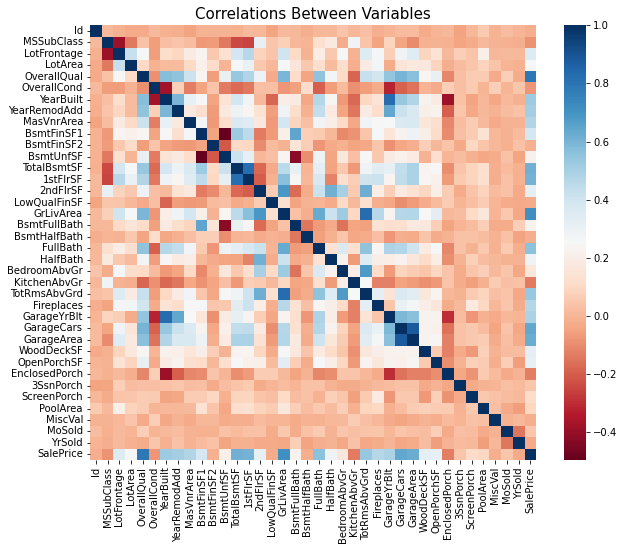

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(Df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

### Combining train and test dataframes for Preprocessing

In [9]:
All_DF=pd.concat([Df,test], ignore_index=True,sort=False)

### Feature Selection

#### We are selecting numerical features which have more than 0.20 or less than -0.20 correlation rate based on Pearson Correlation Method. As for selecting categorical features, selecting only significant categorical variables such as Heating and MSZoning.

In [10]:
important_num_cols = list(Df.corr()["SalePrice"][(Df.corr()["SalePrice"]>0.20) | (Df.corr()["SalePrice"]<-0.20)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

# Making a list of selected features
important_cols = important_num_cols + cat_cols

# Assigning selected variables to a new dataframe
df = Df[important_cols]

#### Viewing Train dataframe with selected features

In [11]:
df

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0            706        150          856       856       854       1710   
1            978        284         1262      1262         0       1262   
2            486        434          920       920       866       1786   
3            216        540          756       961       756       1717   
4            655        490         1145      1145      1053       2198   
...          ...        ...          ...       ...       ...        ...   
1455           0        953          953       953       694       1647   
1456         790        589         1542      2073         0       2073   
1457         275        877         1152      1188      1152       2340   
1458          49          0         1078      1078         0       1078   
1459         830        136         1256      1256         0       1256   

      BsmtFullBath  FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0                1         2         1             8           0       2003.0   
1                0         2         0             6           1       1976.0   
2                1         2         1             6           1       2001.0   
3                1         1         0             7           1       1998.0   
4                1         2         1             9           1       2000.0   
...            ...       ...       ...           ...         ...          ...   
1455             0         2         1             7           1       1999.0   
1456             1         2         0             7           2       1978.0   
1457             0         2         0             9           2       1941.0   
1458             1         1         0             5           0       1950.0   
1459             1         1         1             6           0       1965.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice MSZoning  \
0              2         548           0           61     208500       RL   
1              2         460         298            0     181500       RL   
2              2         608           0           42     223500       RL   
3              3         642           0           35     140000       RL   
4              3         836         192           84     250000       RL   
...          ...         ...         ...          ...        ...      ...   
1455           2         460           0           40     175000       RL   
1456           2         500         349            0     210000       RL   
1457           1         252           0           60     266500       RL   
1458           1         240         366            0     142125       RL   
1459           1         276         736           68     147500       RL   

     Utilities BldgType Heating KitchenQual SaleCondition LandSlope  
0       AllPub     1Fam    GasA          Gd        Normal       Gtl  
1       AllPub     1Fam    GasA          TA        Normal       Gtl  
2       AllPub     1Fam    GasA     

In [12]:
important_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'MSZoning',
 'Utilities',
 'BldgType',
 'Heating',
 'KitchenQual',
 'SaleCondition',
 'LandSlope']

In [13]:
len(important_cols)

30

Copying Selected features list to another list without element 'SalePrice'

In [14]:
important_cols1=[x for x in important_cols if x!='SalePrice']

#### Filtering Test dataframe to have only selected features

In [15]:
test1=test[important_cols1]

#### Combining train and test dataframes having only selected features

In [16]:
all_df=pd.concat([df,test1], ignore_index=True,sort=False)

#### Checking for the missing values

In [17]:
print("Missing Values by Column")
print("-"*30)
print(all_df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",all_df.isna().sum().sum())

Missing Values by Column
------------------------------
LotFrontage       486
LotArea             0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        2
FullBath            0
HalfBath            0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
SalePrice        1459
MSZoning            4
Utilities           2
BldgType            0
Heating             0
KitchenQual         1
SaleCondition       0
LandSlope           0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 2141


### Imputing Missing values with appropriate methods

Replacing missing values with mean for Numeric columns and mode for categorical columns

In [18]:
a=all_df['MasVnrArea'].mean()
b=all_df['BsmtFinSF1'].mean()
c=all_df['BsmtUnfSF'].mean()
d=all_df['TotalBsmtSF'].mean()
e=all_df['BsmtFullBath'].mode()
f=all_df['GarageCars'].mean()
g=all_df['GarageArea'].mean()
h=all_df['MSZoning'].mode()
i=all_df['Utilities'].mode()
j=all_df['KitchenQual'].mode()

In [19]:
all_df['MasVnrArea'].fillna(value=a,inplace=True)
all_df['BsmtFinSF1'].fillna(value=b,inplace=True)
all_df['BsmtUnfSF'].fillna(value=c,inplace=True)
all_df['TotalBsmtSF'].fillna(value=d,inplace=True)
all_df['BsmtFullBath'].fillna(value=0,inplace=True)
all_df['GarageCars'].fillna(value=f,inplace=True)
all_df['GarageArea'].fillna(value=g,inplace=True)
all_df['MSZoning'].fillna(value='RL',inplace=True)
all_df['Utilities'].fillna(value='AllPub',inplace=True)
all_df['KitchenQual'].fillna(value='TA',inplace=True)

In [20]:
print("Missing Values by Column")
print("-"*30)
print(all_df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",all_df.isna().sum().sum())

Missing Values by Column
------------------------------
LotFrontage       486
LotArea             0
OverallQual         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          0
BsmtFinSF1          0
BsmtUnfSF           0
TotalBsmtSF         0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
SalePrice        1459
MSZoning            0
Utilities           0
BldgType            0
Heating             0
KitchenQual         0
SaleCondition       0
LandSlope           0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 2104


#### Dropping Target Column and GarageYrBlt column as its many entries match with YearBuilt column

In [21]:
all_df1=all_df.drop(['SalePrice','GarageYrBlt'],axis=1)

### Imputing missing values for LotFrontage by Regression

#### Selecting features for predicting LotFrontage by Regression

In [22]:
FrontagePredictors=list(all_df1.corr()['LotFrontage'][(all_df1.corr()["LotFrontage"]>0.30) | (all_df1.corr()["LotFrontage"]<-0.30)].index)

#### Filtering dataframe to include features for predicting LotFrontage

In [23]:
Frontagedf=all_df1[FrontagePredictors]

#### Selecting categorical features for predicting LotFrontage

In [24]:
df2=All_DF[['BldgType','LandSlope','Street']]

In [25]:
Frontagedf=pd.concat([Frontagedf,df2], axis=1,sort=False)

<AxesSubplot:>

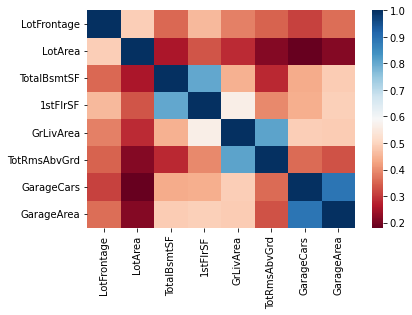

In [26]:
sns.heatmap(Frontagedf.corr(), cmap="RdBu")

In [27]:
Frontagedf

LotFrontage  LotArea  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  \
0            65.0     8450        856.0       856       1710             8   
1            80.0     9600       1262.0      1262       1262             6   
2            68.0    11250        920.0       920       1786             6   
3            60.0     9550        756.0       961       1717             7   
4            84.0    14260       1145.0      1145       2198             9   
...           ...      ...          ...       ...        ...           ...   
2914         21.0     1936        546.0       546       1092             5   
2915         21.0     1894        546.0       546       1092             6   
2916        160.0    20000       1224.0      1224       1224             7   
2917         62.0    10441        912.0       970        970             6   
2918         74.0     9627        996.0       996       2000             9   

      GarageCars  GarageArea BldgType LandSlope Street  
0            2.0       548.0     1Fam       Gtl   Pave  
1            2.0       460.0     1Fam       Gtl   Pave  
2            2.0       608.0     1Fam       Gtl   Pave  
3            3.0       642.0     1Fam       Gtl   Pave  
4            3.0       836.0     1Fam       Gtl   Pave  
...          ...         ...      ...       ...    ...  
2914         0.0         0.0    Twnhs       Gtl   Pave  
2915         1.0       286.0   TwnhsE       Gtl   Pave  
2916         2.0       576.0     1Fam       Gtl   Pave  
2917         0.0         0.0     1Fam       Gtl   Pave  
2918         3.0       650.0     1Fam       Mod   Pave  

[2919 rows x 11 columns]

#### One Hot Encoding categorical columns 

In [28]:
Frontagedf=pd.get_dummies(Frontagedf)

In [29]:
Frontagedf

LotFrontage  LotArea  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  \
0            65.0     8450        856.0       856       1710             8   
1            80.0     9600       1262.0      1262       1262             6   
2            68.0    11250        920.0       920       1786             6   
3            60.0     9550        756.0       961       1717             7   
4            84.0    14260       1145.0      1145       2198             9   
...           ...      ...          ...       ...        ...           ...   
2914         21.0     1936        546.0       546       1092             5   
2915         21.0     1894        546.0       546       1092             6   
2916        160.0    20000       1224.0      1224       1224             7   
2917         62.0    10441        912.0       970        970             6   
2918         74.0     9627        996.0       996       2000             9   

      GarageCars  GarageArea  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0            2.0       548.0              1                0                0   
1            2.0       460.0              1                0                0   
2            2.0       608.0              1                0                0   
3            3.0       642.0              1                0                0   
4            3.0       836.0              1                0                0   
...          ...         ...            ...              ...              ...   
2914         0.0         0.0              0                0                0   
2915         1.0       286.0              0                0                0   
2916         2.0       576.0              1                0                0   
2917         0.0         0.0              1                0                0   
2918         3.0       650.0              1                0                0   

      BldgType_Twnhs  BldgType_TwnhsE  LandSlope_Gtl  LandSlope_Mod  \
0                  0                0              1              0   
1                  0                0              1              0   
2                  0                0              1              0   
3                  0                0              1              0   
4                  0                0              1              0   
...              ...              ...            ...            ...   
2914               1                0              1              0   
2915               0                1              1              0   
2916               0                0              1              0   
2917               0                0              1              0   
2918               0                0              0              1   

      LandSlope_Sev  Street_Grvl  Street_Pave  
0                 0            0            1  
1                 0            0            1  
2                 0            0            1  
3                 0            0            1  
4                 0            0            1  
...             ...          ...          ...  
2914              0            0            1  
2915              0            0            1  
2916              0            0            1  
2917              0            0            1  
2918              0            0            1  

[2919 rows x 18 columns]

### Splitting into train and test set by filtering on null values in LotFrontage column

In [30]:
train=Frontagedf[Frontagedf['LotFrontage'].notnull()]

In [31]:
train.shape

(2433, 18)

In [32]:
test1=Frontagedf[Frontagedf['LotFrontage'].isnull()]

In [33]:
test1.shape

(486, 18)

In [34]:
XFtrain=train.drop(['LotFrontage'],axis=1)

In [35]:
YFtrain=train['LotFrontage']

In [36]:
XFtest=test1.drop(['LotFrontage'],axis=1)

In [37]:
XFtest

LotArea  TotalBsmtSF  1stFlrSF  GrLivArea  TotRmsAbvGrd  GarageCars  \
7       10382       1107.0      1107       2090             7         2.0   
12      12968        912.0       912        912             4         1.0   
14      10920       1253.0      1253       1253             5         1.0   
16      11241       1004.0      1004       1004             5         2.0   
24       8246       1060.0      1060       1060             6         1.0   
...       ...          ...       ...        ...           ...         ...   
2847    11088       1348.0      1358       1358             5         2.0   
2850    21533       1065.0      1065       2049             9         2.0   
2900    50102       1632.0      1650       1650             6         2.0   
2901     8098       1381.0      1403       1403             5         2.0   
2908    11836       1652.0      1652       1652             8         3.0   

      GarageArea  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
7          484.0              1                0                0   
12         352.0              1                0                0   
14         352.0              1                0                0   
16         480.0              1                0                0   
24         270.0              1                0                0   
...          ...            ...              ...              ...   
2847       418.0              1                0                0   
2850       467.0              1                0                0   
2900       518.0              1                0                0   
2901       470.0              1                0                0   
2908       928.0              0                0                1   

      BldgType_Twnhs  BldgType_TwnhsE  LandSlope_Gtl  LandSlope_Mod  \
7                  0                0              1              0   
12                 0                0              1              0   
14                 0                0              1              0   
16                 0                0              1              0   
24                 0                0              1              0   
...              ...              ...            ...            ...   
2847               0                0              1              0   
2850               0                0              1              0   
2900               0                0              0              1   
2901               0                0              1              0   
2908               0                0              1              0   

      LandSlope_Sev  Street_Grvl  Street_Pave  
7                 0            0            1  
12                0            0            1  
14                0            0            1  
16                0            0            1  
24                0            0            1  
...             ...          ...          ...  
2847              0            0            1  
2850              0            0            1  
2900              0            0            1  
2901              0            0            1  
2908              0            0            1  

[486 rows x 17 columns]

In [38]:
Scaler_L=StandardScaler()

In [39]:
XFtrain=Scaler_L.fit_transform(XFtrain)

In [40]:
x_train,x_valid,y_train,y_valid=train_test_split(XFtrain, YFtrain ,test_size=0.3 , random_state=42)

In [41]:
Rfr = RandomForestRegressor(n_estimators = 100, criterion='mse', random_state=1)

In [42]:
Rfr.fit(x_train,y_train)

RandomForestRegressor(criterion='mse', random_state=1)

In [43]:
YFtrainpred=Rfr.predict(x_valid)

In [44]:
result= mean_absolute_error(y_valid,YFtrainpred)
result

10.023040704500978

In [45]:
r2_score(y_valid,YFtrainpred)

0.4649082625969665

In [46]:
Rfr.fit(XFtrain,YFtrain)

RandomForestRegressor(criterion='mse', random_state=1)

In [47]:
XFtest=Scaler_L.fit_transform(XFtest)

In [48]:
YFtestpred=Rfr.predict(XFtest)

In [49]:
YFtestpred

array([ 72.88      ,  77.11      ,  73.93      ,  71.52      ,
        63.15      ,  74.72      ,  64.        ,  66.52      ,
        63.7       ,  67.42      ,  93.48      ,  62.89      ,
        61.42      ,  61.75      ,  72.38      ,  66.66      ,
        61.79      ,  95.69      ,  72.57      ,  70.53      ,
        50.61      ,  67.87      ,  65.86      ,  69.48      ,
        63.73      ,  57.41      ,  70.        ,  76.65      ,
        75.64      ,  75.58      ,  75.4       ,  62.37      ,
        78.45      ,  37.31      ,  79.13      ,  66.22      ,
        45.58102381,  71.64      ,  79.4       ,  56.27      ,
        83.78      ,  61.27      ,  65.77      ,  64.48      ,
        76.06      ,  85.98      ,  67.75      ,  55.88      ,
        56.15      ,  87.91      ,  58.17      ,  69.01      ,
        62.5       ,  84.75      ,  65.73      ,  79.96      ,
       102.25      ,  63.77      ,  70.89      ,  88.04      ,
        61.65      ,  69.78      ,  60.61      ,  55.13

### Filling imputed LotFrontage values in the combined dataframe

In [50]:
all_dfs1 = all_df1.stack(dropna = False)
all_dfs1[all_dfs1.isna()] = YFtestpred
all_df1= all_dfs1.unstack()
all_df1

LotFrontage LotArea OverallQual YearBuilt YearRemodAdd MasVnrArea  \
0           65.0    8450           7      2003         2003      196.0   
1           80.0    9600           6      1976         1976        0.0   
2           68.0   11250           7      2001         2002      162.0   
3           60.0    9550           7      1915         1970        0.0   
4           84.0   14260           8      2000         2000      350.0   
...          ...     ...         ...       ...          ...        ...   
2914        21.0    1936           4      1970         1970        0.0   
2915        21.0    1894           4      1970         1970        0.0   
2916       160.0   20000           5      1960         1996        0.0   
2917        62.0   10441           5      1992         1992        0.0   
2918        74.0    9627           7      1993         1994       94.0   

     BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea  \
0         706.0     150.0       856.0      856      854      1710   
1         978.0     284.0      1262.0     1262        0      1262   
2         486.0     434.0       920.0      920      866      1786   
3         216.0     540.0       756.0      961      756      1717   
4         655.0     490.0      1145.0     1145     1053      2198   
...         ...       ...         ...      ...      ...       ...   
2914        0.0     546.0       546.0      546      546      1092   
2915      252.0     294.0       546.0      546      546      1092   
2916     1224.0       0.0      1224.0     1224        0      1224   
2917      337.0     575.0       912.0      970        0       970   
2918      758.0     238.0       996.0      996     1004      2000   

     BsmtFullBath FullBath HalfBath TotRmsAbvGrd Fireplaces GarageCars  \
0             1.0        2        1            8          0        2.0   
1             0.0        2        0            6          1        2.0   
2             1.0        2        1            6          1        2.0   
3             1.0        1        0            7          1        3.0   
4             1.0        2        1            9          1        3.0   
...           ...      ...      ...          ...        ...        ...   
2914          0.0        1        1            5          0        0.0   
2915          0.0        1        1            6          0        1.0   
2916          1.0        1        0            7          1        2.0   
2917          0.0        1        0            6          0        0.0   
2918          0.0        2        1            9          1        3.0   

     GarageArea WoodDeckSF OpenPorchSF MSZoning Utilities BldgType Heating  \
0         548.0          0          61       RL    AllPub     1Fam    GasA   
1         460.0        298           0       RL    AllPub     1Fam    GasA   
2         608.0          0          42       RL    AllPub     1Fam    GasA   
3         642.0          0          35       RL    AllPub     1Fam    GasA   
4         836.0        192          84       RL    AllPub     1Fam    GasA   
...         ...        ...         ...      ...       ...      ...     ...   
2914        0.0          0           0       RM    AllPub    Twnhs    GasA   
2915      286.0          0          24       RM    AllPub   TwnhsE    GasA   
2916      576.0        474           0       RL    AllPub     1Fam    GasA   
2917        0.0         80          32       RL    AllPub     1Fam    GasA   
2918      650.0        190          48       RL    AllPub     1Fam    GasA   

     KitchenQual SaleCondition LandSlope  
0             Gd        Normal       Gtl  
1             TA        Normal       Gtl  
2             Gd        Normal       Gtl  
3             Gd       Abnorml       Gtl  
4             Gd        Normal       Gtl  
...          ...           ...       ...  
2914          TA        Normal       Gtl  
2915          TA       Abnorml       Gtl  
2916          TA       Abnorml       Gtl  
2917          TA        Normal 

In [51]:
all_df1

LotFrontage LotArea OverallQual YearBuilt YearRemodAdd MasVnrArea  \
0           65.0    8450           7      2003         2003      196.0   
1           80.0    9600           6      1976         1976        0.0   
2           68.0   11250           7      2001         2002      162.0   
3           60.0    9550           7      1915         1970        0.0   
4           84.0   14260           8      2000         2000      350.0   
...          ...     ...         ...       ...          ...        ...   
2914        21.0    1936           4      1970         1970        0.0   
2915        21.0    1894           4      1970         1970        0.0   
2916       160.0   20000           5      1960         1996        0.0   
2917        62.0   10441           5      1992         1992        0.0   
2918        74.0    9627           7      1993         1994       94.0   

     BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea  \
0         706.0     150.0       856.0      856      854      1710   
1         978.0     284.0      1262.0     1262        0      1262   
2         486.0     434.0       920.0      920      866      1786   
3         216.0     540.0       756.0      961      756      1717   
4         655.0     490.0      1145.0     1145     1053      2198   
...         ...       ...         ...      ...      ...       ...   
2914        0.0     546.0       546.0      546      546      1092   
2915      252.0     294.0       546.0      546      546      1092   
2916     1224.0       0.0      1224.0     1224        0      1224   
2917      337.0     575.0       912.0      970        0       970   
2918      758.0     238.0       996.0      996     1004      2000   

     BsmtFullBath FullBath HalfBath TotRmsAbvGrd Fireplaces GarageCars  \
0             1.0        2        1            8          0        2.0   
1             0.0        2        0            6          1        2.0   
2             1.0        2        1            6          1        2.0   
3             1.0        1        0            7          1        3.0   
4             1.0        2        1            9          1        3.0   
...           ...      ...      ...          ...        ...        ...   
2914          0.0        1        1            5          0        0.0   
2915          0.0        1        1            6          0        1.0   
2916          1.0        1        0            7          1        2.0   
2917          0.0        1        0            6          0        0.0   
2918          0.0        2        1            9          1        3.0   

     GarageArea WoodDeckSF OpenPorchSF MSZoning Utilities BldgType Heating  \
0         548.0          0          61       RL    AllPub     1Fam    GasA   
1         460.0        298           0       RL    AllPub     1Fam    GasA   
2         608.0          0          42       RL    AllPub     1Fam    GasA   
3         642.0          0          35       RL    AllPub     1Fam    GasA   
4         836.0        192          84       RL    AllPub     1Fam    GasA   
...         ...        ...         ...      ...       ...      ...     ...   
2914        0.0          0           0       RM    AllPub    Twnhs    GasA   
2915      286.0          0          24       RM    AllPub   TwnhsE    GasA   
2916      576.0        474           0       RL    AllPub     1Fam    GasA   
2917        0.0         80          32       RL    AllPub     1Fam    GasA   
2918      650.0        190          48       RL    AllPub     1Fam    GasA   

     KitchenQual SaleCondition LandSlope  
0             Gd        Normal       Gtl  
1             TA        Normal       Gtl  
2             Gd        Normal       Gtl  
3             Gd       Abnorml       Gtl  
4             Gd        Normal       Gtl  
...          ...           ...       ...  
2914          TA        Normal       Gtl  
2915          TA       Abnorml       Gtl  
2916          TA       Abnorml       Gtl  
2917          TA        Normal 

In [52]:
all_df1['SalePrice']=all_df['SalePrice']

In [53]:
Train=all_df1[0:1460]

In [54]:
Train

LotFrontage LotArea OverallQual YearBuilt YearRemodAdd MasVnrArea  \
0           65.0    8450           7      2003         2003      196.0   
1           80.0    9600           6      1976         1976        0.0   
2           68.0   11250           7      2001         2002      162.0   
3           60.0    9550           7      1915         1970        0.0   
4           84.0   14260           8      2000         2000      350.0   
...          ...     ...         ...       ...          ...        ...   
1455        62.0    7917           6      1999         2000        0.0   
1456        85.0   13175           6      1978         1988      119.0   
1457        66.0    9042           7      1941         2006        0.0   
1458        68.0    9717           5      1950         1996        0.0   
1459        75.0    9937           5      1965         1965        0.0   

     BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea  \
0         706.0     150.0       856.0      856      854      1710   
1         978.0     284.0      1262.0     1262        0      1262   
2         486.0     434.0       920.0      920      866      1786   
3         216.0     540.0       756.0      961      756      1717   
4         655.0     490.0      1145.0     1145     1053      2198   
...         ...       ...         ...      ...      ...       ...   
1455        0.0     953.0       953.0      953      694      1647   
1456      790.0     589.0      1542.0     2073        0      2073   
1457      275.0     877.0      1152.0     1188     1152      2340   
1458       49.0       0.0      1078.0     1078        0      1078   
1459      830.0     136.0      1256.0     1256        0      1256   

     BsmtFullBath FullBath HalfBath TotRmsAbvGrd Fireplaces GarageCars  \
0             1.0        2        1            8          0        2.0   
1             0.0        2        0            6          1        2.0   
2             1.0        2        1            6          1        2.0   
3             1.0        1        0            7          1        3.0   
4             1.0        2        1            9          1        3.0   
...           ...      ...      ...          ...        ...        ...   
1455          0.0        2        1            7          1        2.0   
1456          1.0        2        0            7          2        2.0   
1457          0.0        2        0            9          2        1.0   
1458          1.0        1        0            5          0        1.0   
1459          1.0        1        1            6          0        1.0   

     GarageArea WoodDeckSF OpenPorchSF MSZoning Utilities BldgType Heating  \
0         548.0          0          61       RL    AllPub     1Fam    GasA   
1         460.0        298           0       RL    AllPub     1Fam    GasA   
2         608.0          0          42       RL    AllPub     1Fam    GasA   
3         642.0          0          35       RL    AllPub     1Fam    GasA   
4         836.0        192          84       RL    AllPub     1Fam    GasA   
...         ...        ...         ...      ...       ...      ...     ...   
1455      460.0          0          40       RL    AllPub     1Fam    GasA   
1456      500.0        349           0       RL    AllPub     1Fam    GasA   
1457      252.0          0          60       RL    AllPub     1Fam    GasA   
1458      240.0        366           0       RL    AllPub     1Fam    GasA   
1459      276.0        736          68       RL    AllPub     1Fam    GasA   

     KitchenQual SaleCondition LandSlope  SalePrice  
0             Gd        Normal       Gtl   208500.0  
1             TA        Normal       Gtl   181500.0  
2             Gd        Normal       Gtl   223500.0  
3             Gd       Abnorml       Gtl   140000.0  
4             Gd        Normal       Gtl   250000.0  
...          ...           ...       ...        ...  
1455          TA        Normal       Gtl   175000.0  
1456          TA        Norma

In [55]:
Test=all_df1[1460:]

In [56]:
Test

LotFrontage LotArea OverallQual YearBuilt YearRemodAdd MasVnrArea  \
1460        80.0   11622           5      1961         1961        0.0   
1461        81.0   14267           6      1958         1958      108.0   
1462        74.0   13830           5      1997         1998        0.0   
1463        78.0    9978           6      1998         1998       20.0   
1464        43.0    5005           8      1992         1992        0.0   
...          ...     ...         ...       ...          ...        ...   
2914        21.0    1936           4      1970         1970        0.0   
2915        21.0    1894           4      1970         1970        0.0   
2916       160.0   20000           5      1960         1996        0.0   
2917        62.0   10441           5      1992         1992        0.0   
2918        74.0    9627           7      1993         1994       94.0   

     BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea  \
1460      468.0     270.0       882.0      896        0       896   
1461      923.0     406.0      1329.0     1329        0      1329   
1462      791.0     137.0       928.0      928      701      1629   
1463      602.0     324.0       926.0      926      678      1604   
1464      263.0    1017.0      1280.0     1280        0      1280   
...         ...       ...         ...      ...      ...       ...   
2914        0.0     546.0       546.0      546      546      1092   
2915      252.0     294.0       546.0      546      546      1092   
2916     1224.0       0.0      1224.0     1224        0      1224   
2917      337.0     575.0       912.0      970        0       970   
2918      758.0     238.0       996.0      996     1004      2000   

     BsmtFullBath FullBath HalfBath TotRmsAbvGrd Fireplaces GarageCars  \
1460          0.0        1        0            5          0        1.0   
1461          0.0        1        1            6          0        1.0   
1462          0.0        2        1            6          1        2.0   
1463          0.0        2        1            7          1        2.0   
1464          0.0        2        0            5          0        2.0   
...           ...      ...      ...          ...        ...        ...   
2914          0.0        1        1            5          0        0.0   
2915          0.0        1        1            6          0        1.0   
2916          1.0        1        0            7          1        2.0   
2917          0.0        1        0            6          0        0.0   
2918          0.0        2        1            9          1        3.0   

     GarageArea WoodDeckSF OpenPorchSF MSZoning Utilities BldgType Heating  \
1460      730.0        140           0       RH    AllPub     1Fam    GasA   
1461      312.0        393          36       RL    AllPub     1Fam    GasA   
1462      482.0        212          34       RL    AllPub     1Fam    GasA   
1463      470.0        360          36       RL    AllPub     1Fam    GasA   
1464      506.0          0          82       RL    AllPub   TwnhsE    GasA   
...         ...        ...         ...      ...       ...      ...     ...   
2914        0.0          0           0       RM    AllPub    Twnhs    GasA   
2915      286.0          0          24       RM    AllPub   TwnhsE    GasA   
2916      576.0        474           0       RL    AllPub     1Fam    GasA   
2917        0.0         80          32       RL    AllPub     1Fam    GasA   
2918      650.0        190          48       RL    AllPub     1Fam    GasA   

     KitchenQual SaleCondition LandSlope  SalePrice  
1460          TA        Normal       Gtl        NaN  
1461          Gd        Normal       Gtl        NaN  
1462          TA        Normal       Gtl        NaN  
1463          Gd        Normal       Gtl        NaN  
1464          Gd        Normal       Gtl        NaN  
...          ...           ...       ...        ...  
2914          TA        Normal       Gtl        NaN  
2915          TA       Abnorm

In [57]:
Test.drop(['SalePrice'],axis=1,inplace=True)

## Data Visualization

**Visualizing the Correlation between the numerical variables of training data using pairplot visualization**

In [58]:
important_num_cols.remove('GarageYrBlt')

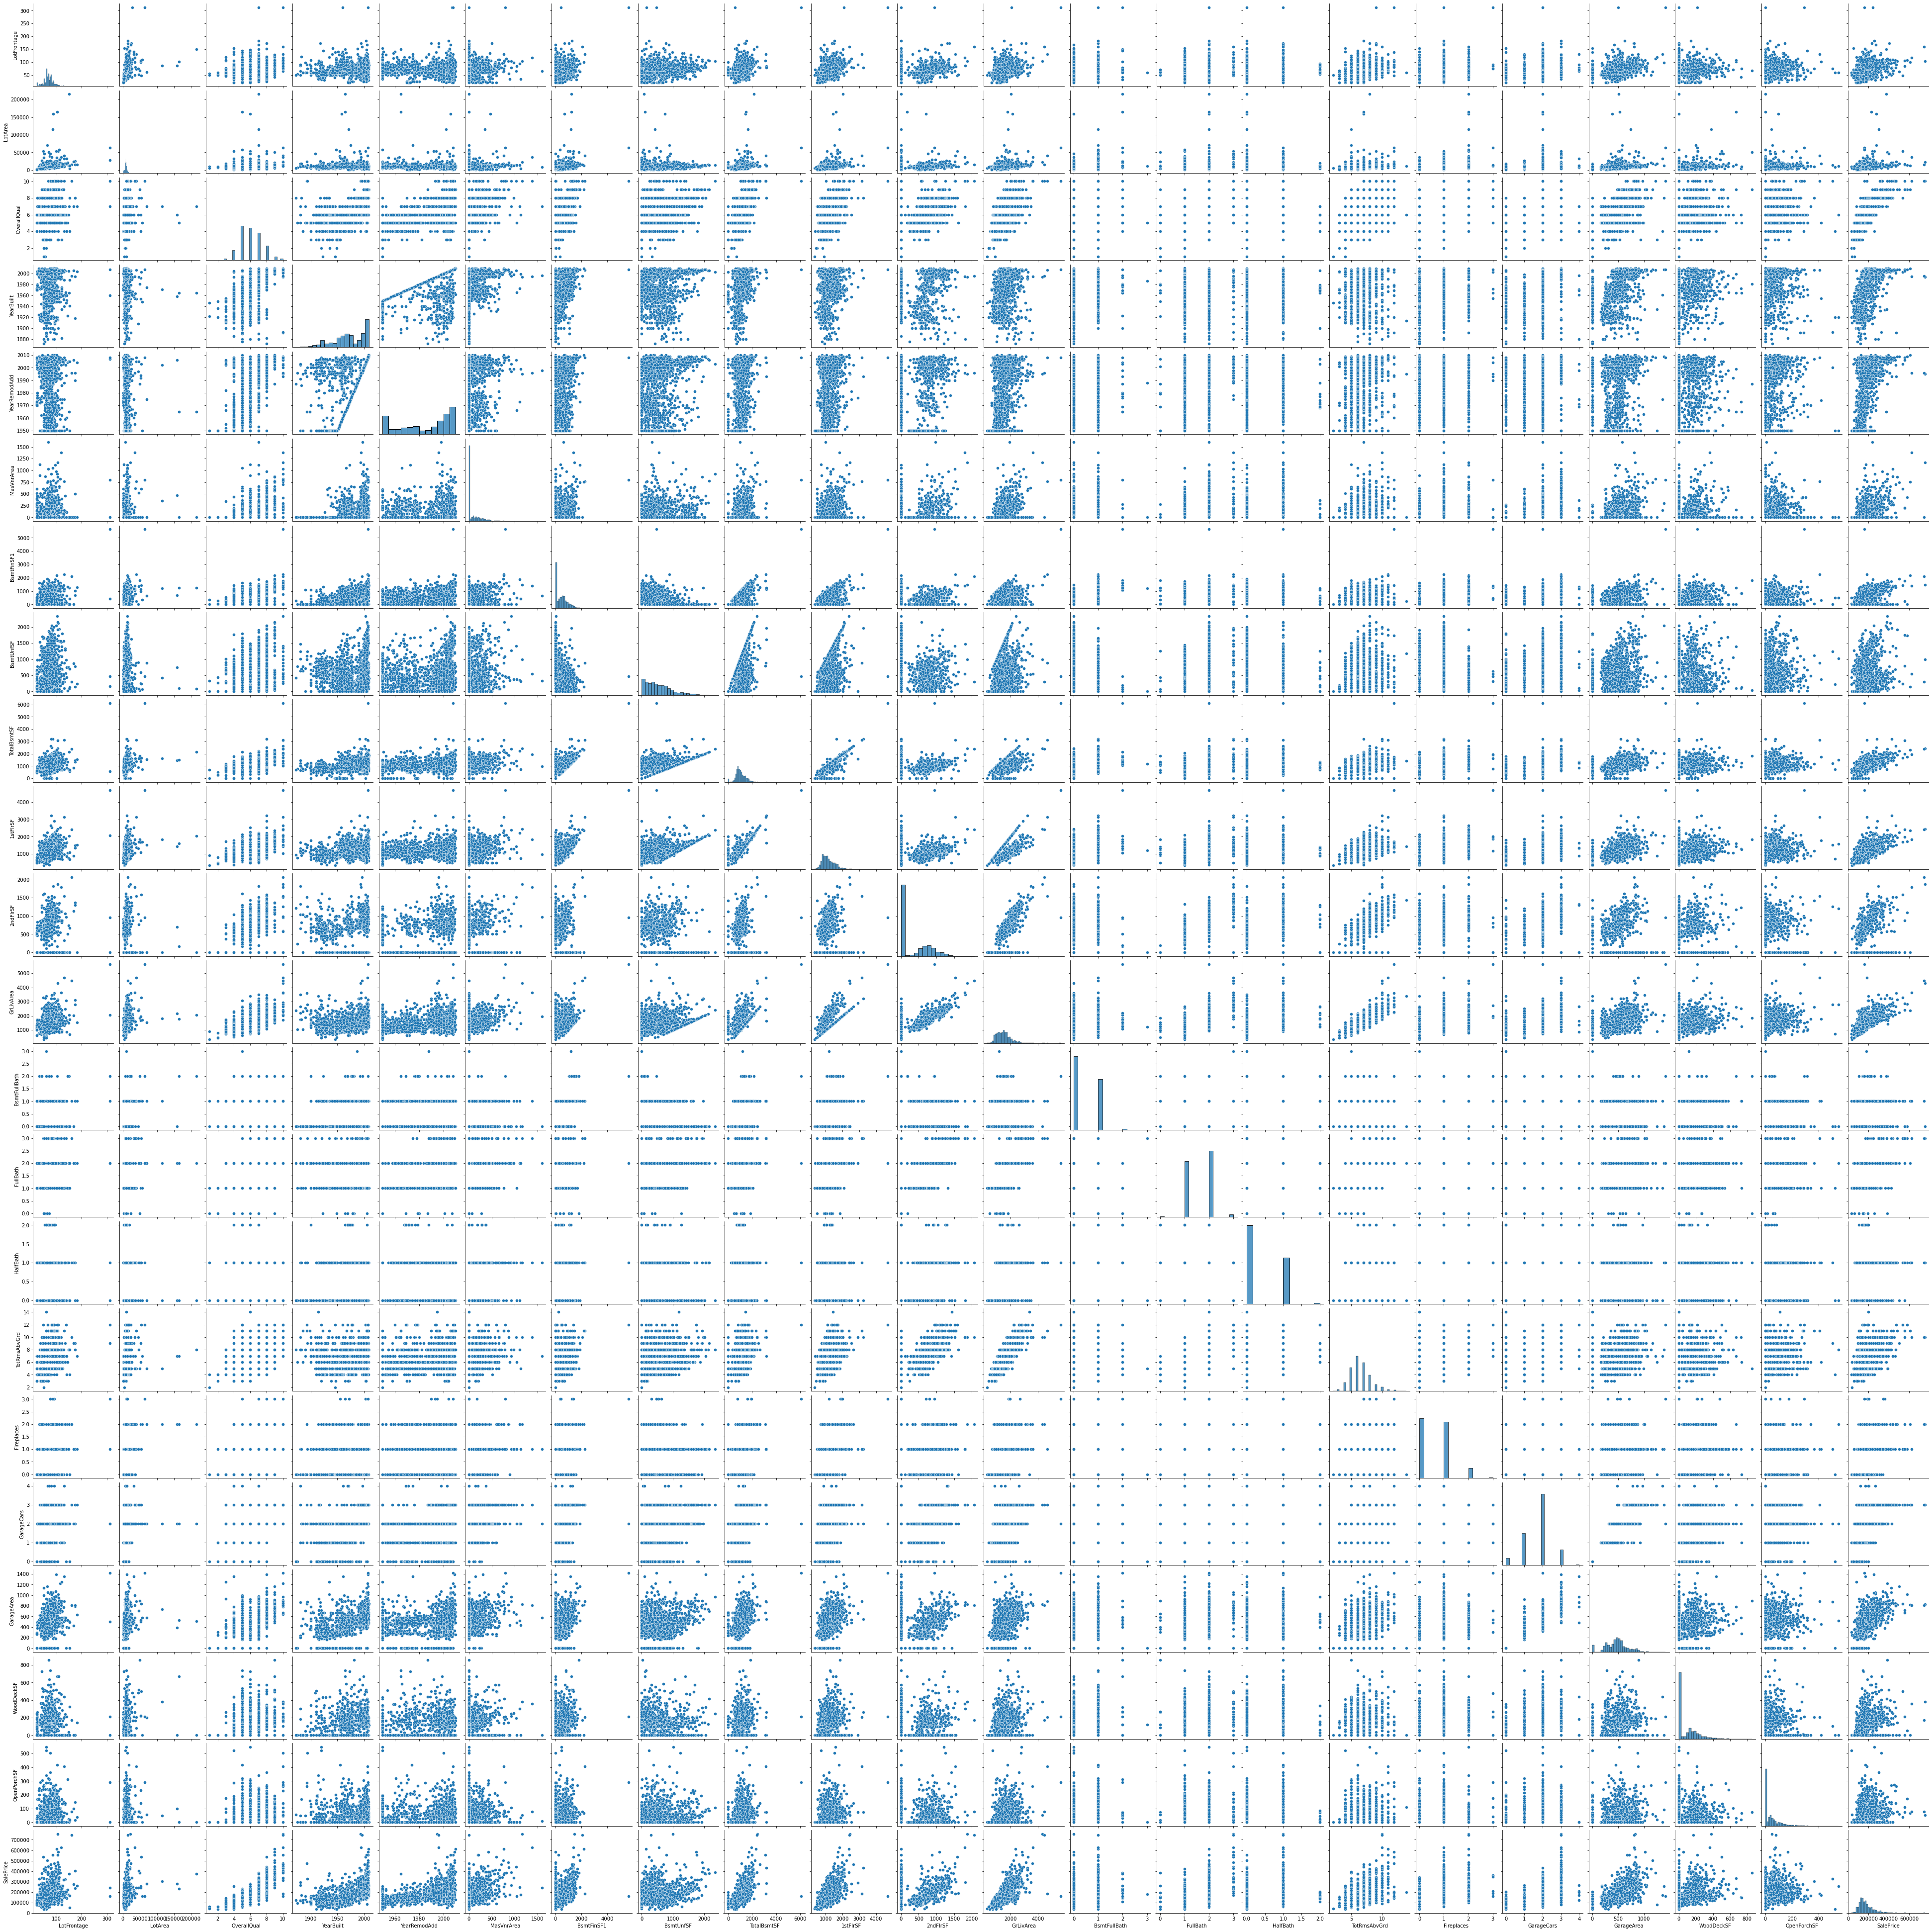

In [59]:
sns.pairplot(Train[important_num_cols])

***Visualizing the Correlation between each column and the target variable using jointplot visualization***

<Figure size 720x576 with 0 Axes>

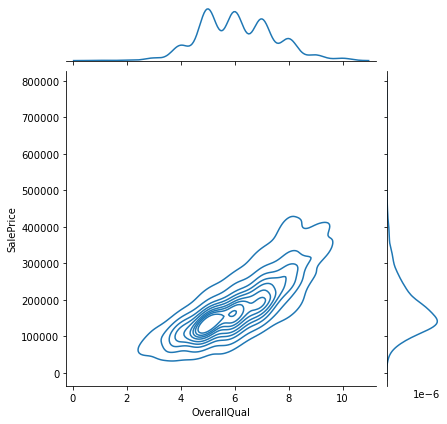

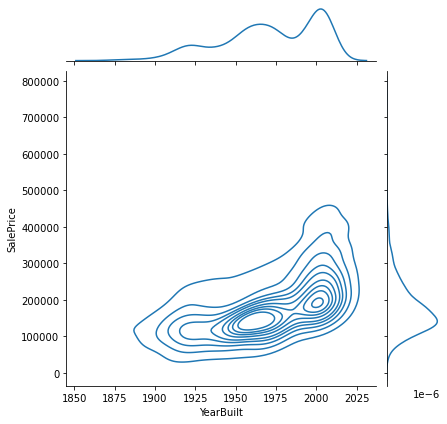

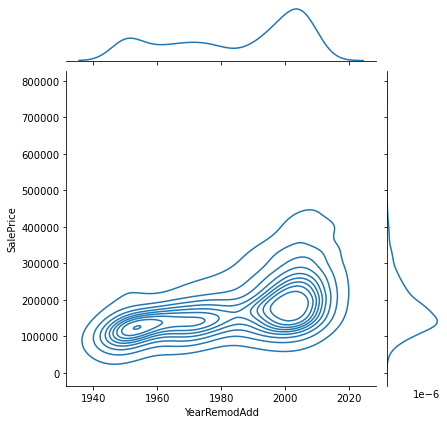

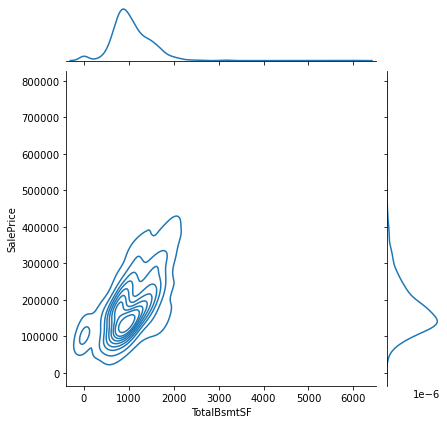

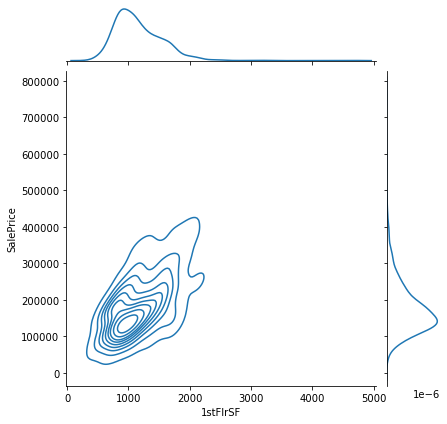

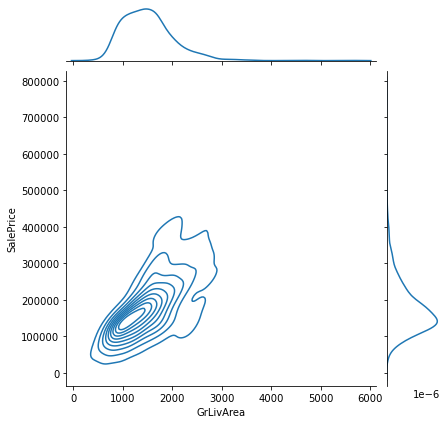

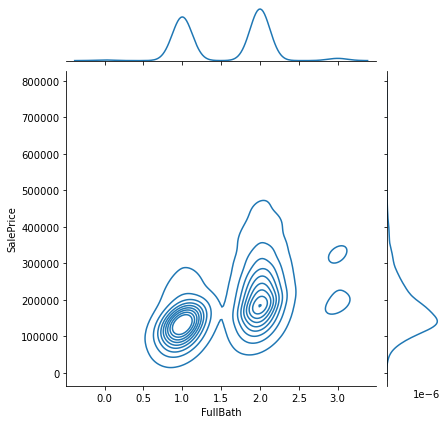

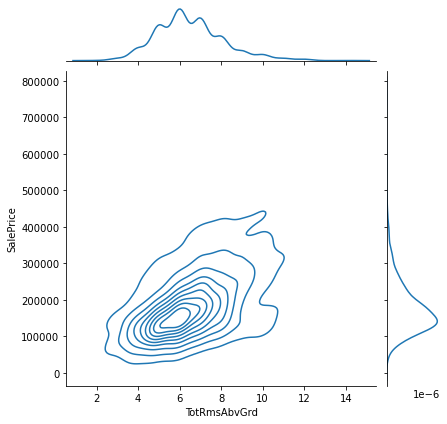

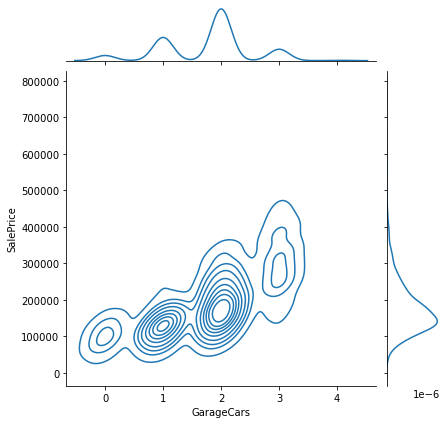

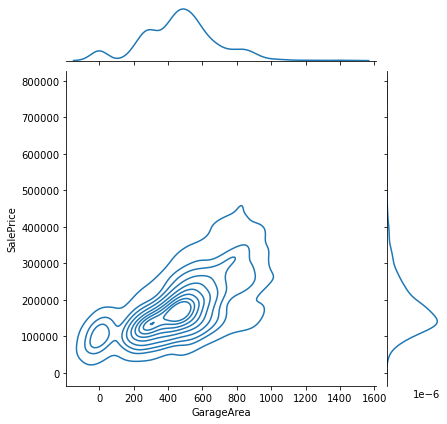

In [60]:
plt.figure(figsize=(10,8))
sns.jointplot(x=Train["OverallQual"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["YearBuilt"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["YearRemodAdd"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["TotalBsmtSF"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["1stFlrSF"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["GrLivArea"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["FullBath"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["TotRmsAbvGrd"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["GarageCars"], y=Train["SalePrice"], kind="kde")
sns.jointplot(x=Train["GarageArea"], y=Train["SalePrice"], kind="kde")
plt.show()

## X, y Split

**Splitting the data into X and y sets**

In [61]:
X = Train.drop("SalePrice", axis=1)
y = Train["SalePrice"]

## One-Hot Encoding

#### Encoding the categorical features in X dataset by using One-Hot Encoding method

In [62]:
X = pd.get_dummies(X, columns=cat_cols)

## Scaling Features

In [63]:
pd.set_option('display.max_columns',100)

In [64]:
X.head()

LotFrontage LotArea OverallQual YearBuilt YearRemodAdd MasVnrArea  \
0        65.0    8450           7      2003         2003      196.0   
1        80.0    9600           6      1976         1976        0.0   
2        68.0   11250           7      2001         2002      162.0   
3        60.0    9550           7      1915         1970        0.0   
4        84.0   14260           8      2000         2000      350.0   

  BsmtFinSF1 BsmtUnfSF TotalBsmtSF 1stFlrSF 2ndFlrSF GrLivArea BsmtFullBath  \
0      706.0     150.0       856.0      856      854      1710          1.0   
1      978.0     284.0      1262.0     1262        0      1262          0.0   
2      486.0     434.0       920.0      920      866      1786          1.0   
3      216.0     540.0       756.0      961      756      1717          1.0   
4      655.0     490.0      1145.0     1145     1053      2198          1.0   

  FullBath HalfBath TotRmsAbvGrd Fireplaces GarageCars GarageArea WoodDeckSF  \
0        2        1            8          0        2.0      548.0          0   
1        2        0            6          1        2.0      460.0        298   
2        2        1            6          1        2.0      608.0          0   
3        1        0            7          1        3.0      642.0          0   
4        2        1            9          1        3.0      836.0        192   

  OpenPorchSF  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0          61                 0            0            0            1   
1           0                 0            0            0            1   
2          42                 0            0            0            1   
3          35                 0            0            0            1   
4          84                 0            0            0            1   

   MSZoning_RM  Utilities_AllPub  Utilities_NoSeWa  BldgType_1Fam  \
0            0                 1                 0              1   
1            0                 1                 0              1   
2            0                 1                 0              1   
3            0                 1                 0              1   
4            0                 1                 0              1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  Heating_OthW  \
0              0             1             0             0             0   
1              0             1             0             0             0   
2              0             1             0             0             0   
3              0             1             0             0             0   
4              0             1             0             0             0   

   Heating_Wall  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  \
0             0               0               0               1   
1             0               0               0               0   
2             0               0               0               1   
3             0               0               0               1   
4             0               0               0               1   

   KitchenQual_TA  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0               0                      0                      0   
1               1                      0                      0   
2               0                      0                      0   
3               0                      1                      0   
4               0                      0                      0   

   SaleCondition_Alloca  SaleCondition_Family  SaleCondition_No

In [65]:
important_num_cols.remove('SalePrice')

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [66]:
X.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.216837 -0.207142     0.651479   1.050994      0.878668    0.511463   
1     0.440047 -0.091886    -0.071836   0.156734     -0.429577   -0.574365   
2    -0.085460  0.073480     0.651479   0.984752      0.830215    0.323105   
3    -0.435799 -0.096897     0.651479  -1.863632     -0.720298   -0.574365   
4     0.615216  0.375148     1.374795   0.951632      0.733308    1.364614   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0    0.575425  -0.944591    -0.459303 -0.793434  1.161852   0.370333   
1    1.171992  -0.641228     0.466465  0.257140 -0.795163  -0.482512   
2    0.092907  -0.301643    -0.313369 -0.627826  1.189351   0.515013   
3   -0.499274  -0.061670    -0.687324 -0.521734  0.937276   0.383659   
4    0.463568  -0.174865     0.199680 -0.045611  1.617877   1.299326   

   BsmtFullBath  FullBath  HalfBath  TotRmsAbvGrd  Fireplaces  GarageCars  \
0      1.107810  0.789741  1.227585      0.912210   -0.951226    0.311725   
1     -0.819964  0.789741 -0.761621     -0.318683    0.600495    0.311725   
2      1.107810  0.789741  1.227585     -0.318683    0.600495    0.311725   
3      1.107810 -1.026041 -0.761621      0.296763    0.600495    1.650307   
4      1.107810  0.789741  1.227585      1.527656    0.600495    1.650307   

   GarageArea  WoodDeckSF  OpenPorchSF  MSZoning_C (all)  MSZoning_FV  \
0    0.351000   -0.752176     0.216503                 0            0   
1   -0.060731    1.626195    -0.704483                 0            0   
2    0.631726   -0.752176    -0.070361                 0            0   
3    0.790804   -0.752176    -0.176048                 0            0   
4    1.698485    0.780197     0.563760                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Utilities_AllPub  Utilities_NoSeWa  \
0            0            1            0                 1                 0   
1            0            1            0                 1                 0   
2            0            1            0                 1                 0   
3            0            1            0                 1                 0   
4            0            1            0                 1                 0   

   BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  \
0              1                0                0               0   
1              1                0                0               0   
2              1                0                0               0   
3              1                0                0               0   
4              1                0                0               0   

   BldgType_TwnhsE  Heating_Floor  Heating_GasA  Heating_GasW  Heating_Grav  \
0                0              0             1             0             0   
1                0              0             1             0             0   
2                0              0             1             0             0   
3                0              0             1             0             0   
4                0              0             1             0             0   

   Heating_OthW  Heating_Wall  KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  \
0             0             0               0               0               1   
1             0             0               0               0               0   
2             0             0               0               0               1   
3             0             0               0               0               1   
4             0             0               0               0               1   

   KitchenQual_TA  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0               0                      0                      0   
1               1                      0                      0   
2               0                      0                      0   
3               0                      1                      0   


### Train-Test Split

**Splitting the data into Train and Test Set**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Defining evaluation function for convenience**

In [68]:

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

## Machine Learning Models

In [69]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

### Linear Regression

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 22199.686739062003
MSE: 1256053526.000556
RMSE: 35440.84544703407
R2 Score: 0.836245096743913


### Ridge Regression

In [71]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 22107.09183884377
MSE: 1252334560.0664563
RMSE: 35388.33932337679
R2 Score: 0.8367299478224259


### Lasso Regression

In [72]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 22194.95994366587
MSE: 1255767358.0045242
RMSE: 35436.807954505784
R2 Score: 0.8362824051957705


### ElasticNet Regression

In [73]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 22322.37899020225
MSE: 1489816932.8399422
RMSE: 38598.146753956236
R2 Score: 0.8057687649002492


### Random Forest Regression

In [74]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 17713.940833333334
MSE: 792201698.0815377
RMSE: 28146.077845439457
R2 Score: 0.8967186431602816


### XGBoost Regression

In [75]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01, )
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 17213.363093964042
MSE: 887106268.087702
RMSE: 29784.329236826907
R2 Score: 0.8843456922006159


### Polynomial Regression (Degree=2)

In [76]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 202581968588349.66
MSE: 7.91459880962913e+29
RMSE: 889640309879736.1
R2 Score: -1.0318464424906881e+20


## Model Comparison

**The less the Root Mean Squared Error (RMSE), The better the model is.**

In [77]:
models.drop(6, axis=0, inplace=True)

In [78]:
models.sort_values(by="RMSE")

Model           MAE                MSE          RMSE  \
4  RandomForestRegressor  17713.940833   792201698.081538  28146.077845   
5           XGBRegressor  17213.363094   887106268.087702  29784.329237   
1                  Ridge  22107.091839  1252334560.066456  35388.339323   
2                  Lasso  22194.959944  1255767358.004524  35436.807955   
0       LinearRegression  22199.686739  1256053526.000556  35440.845447   
3             ElasticNet   22322.37899  1489816932.839942  38598.146754   

   R2 Score  
4  0.896719  
5  0.884346  
1   0.83673  
2  0.836282  
0  0.836245  
3  0.805769

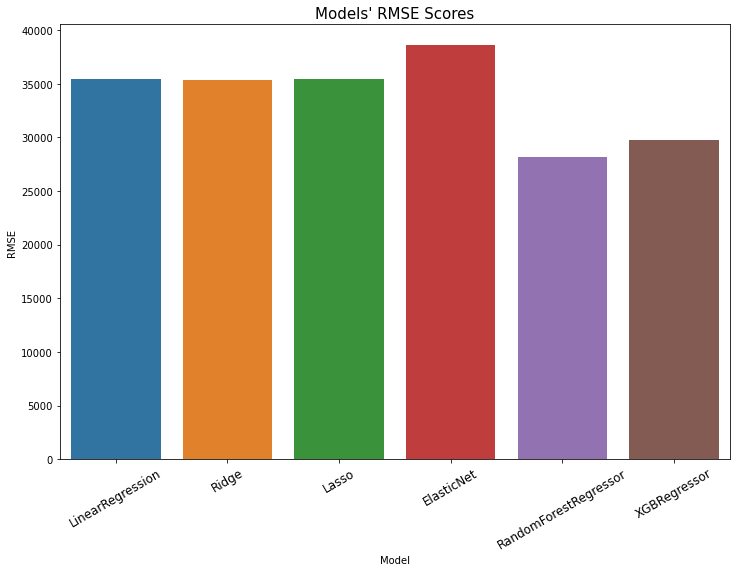

In [79]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

### Making Test dataframe

In [80]:
Xtest=Test

In [81]:
Xtest = pd.get_dummies(Xtest, columns=cat_cols)

In [82]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev'],
      dtype='object')

In [83]:
Xtest.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Utilities_AllPub', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav',
       'Heating_Wall', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Gtl', 'LandSlope_Mod',
       'LandSlope_Sev'],
      dtype='object')

#### Preprocessing Test dataframe

In [84]:
Xtest['Utilities_NoSeWa']=0
Xtest['Heating_Floor']=0
Xtest['Heating_OthW']=0

In [85]:
Xtest[important_num_cols] = scaler.fit_transform(Xtest[important_num_cols])

### Predicting House Prices of test dataset

In [86]:
Ypred = xgb.predict(Xtest)

In [87]:
YpredR=random_forest.predict(Xtest)

In [88]:
Ypred.shape

(1459,)

In [89]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [90]:
Idlist=test['Id']

In [91]:
Dict={'Id':Idlist,'SalePrice':Ypred}

In [92]:
Pred_df=pd.DataFrame(Dict)

In [93]:
Pred_df.head()

Id      SalePrice
0  1461  130973.890625
1  1462  151377.656250
2  1463  207237.546875
3  1464  187755.500000
4  1465  194066.484375

In [94]:
Pred_df.to_csv('Submission4.csv')

In [95]:
DictR={'Id':Idlist,'SalePrice':YpredR}

In [96]:
Pred_dfR=pd.DataFrame(DictR)

In [97]:
Pred_dfR.to_csv('Submission5.csv')